# To Explore Unsupervised Machine Learning

###

In [ ]:
# do the necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
iris = pd.read_csv(r"C:/Users/Tanmay Ambatkar/Desktop/Task 3/Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## check the nulls


In [6]:
iris.isnull().sum()  # No Nulls are present

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Remove ID Column as its not required

In [7]:
iris.drop(["Id"] ,axis = 1 , inplace = True)

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Check value counts of "Species"column

In [9]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Lets Convert non-numeric column i.e "Species" to numeric

In [10]:
iris.Species.replace({"Iris-versicolor":0 , "Iris-setosa":1 , "Iris-virginica":2} , inplace = True)

In [11]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


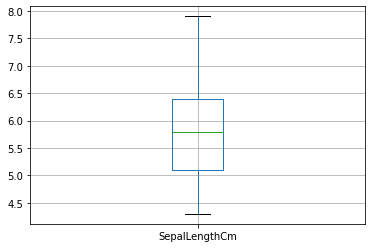

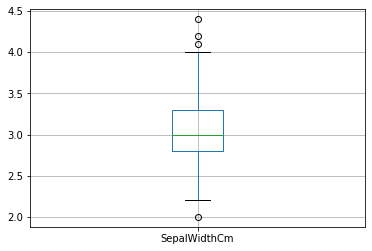

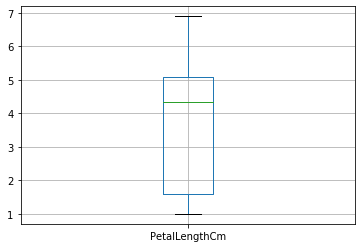

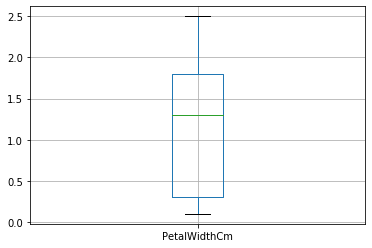

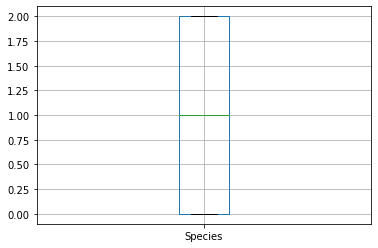

In [12]:
#check outliers
for i in iris.columns:
    plt.figure()
    iris.boxplot([i])

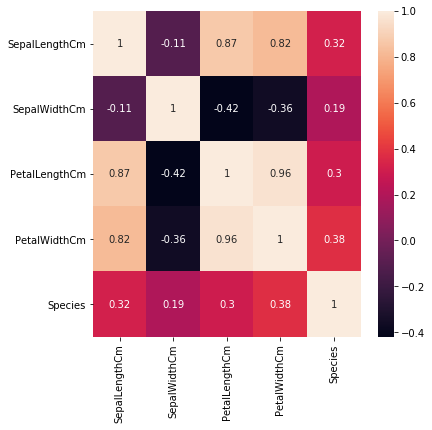

In [13]:
# Heat map

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(iris.corr(),annot= True )

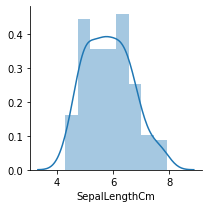

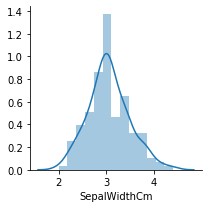

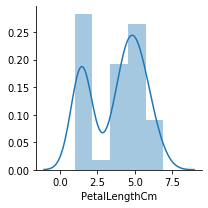

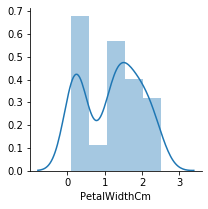

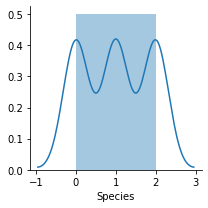

In [14]:
#check distribution of the data

for i in iris.columns:
    g = sns.FacetGrid(data=iris,legend_out=False)
    print(g.map(sns.distplot,i))

# Lets perform elbow plot on the data to find optimum number of 

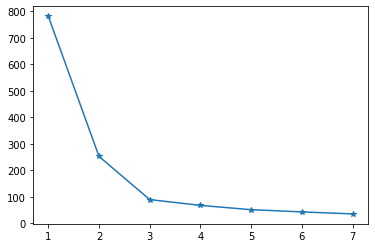

In [15]:
from sklearn.cluster import KMeans
aa = list()
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris)
    dist = kmeans.fit(iris).score(iris)
    aa.append(dist)
    
# Elbow Method

aa = np.absolute(aa)
abc = [1,2,3,4,5,6,7]
plt.plot(abc,aa, marker = "*")

# As we can see the elbow plot has been gradually decreased till 3 and after that its slow down and seems the constant rate of decrease

## So the optimum no of k = 3

### Lets build K-Means Model on this data

In [16]:
kmeans_iris = KMeans(n_clusters=3, max_iter = 100)

In [17]:
# fit the model

kmeans_iris.fit(iris)
print("Model has been fitted")

Model has been fitted


In [18]:
# check cluster centers

(kmeans_iris.cluster_centers_)

array([[6.588, 2.974, 5.552, 2.026, 2.   ],
       [5.006, 3.418, 1.464, 0.244, 1.   ],
       [5.936, 2.77 , 4.26 , 1.326, 0.   ]])

In [19]:
# This shows that which points are part of which cluster

df_iris = pd.concat([iris, pd.Series(kmeans_iris.labels_)], axis =1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [20]:
# reaname the column 0 which was added above

df_iris.rename(columns = {0:"Clusters"},inplace = True)


In [21]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [22]:
# predic
x = iris.iloc[:, [0, 1, 2, 3]].values
y_kmeans = kmeans.fit_predict(x)

# Visualizing the cluster

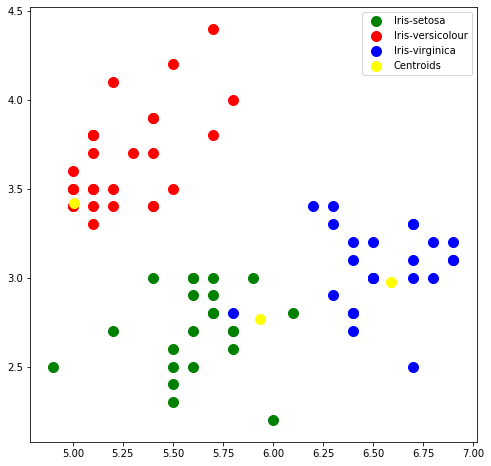

In [23]:
#plot a graph that represent the three clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [24]:
import pickle

pickle.dump(kmeans_iris,open('iris.pkl','wb'))

In [25]:
# load the model
kmeans_iris = pickle.load(open('iris.pkl','rb'))